In [2]:
import requests # Digunakan untuk mengirim permintaan HTTP ke halaman web.
from bs4 import BeautifulSoup # Digunakan untuk mem-parsing dokumen HTML. 
import csv # Digunakan untuk membaca dan menulis data dalam format CSV

web_url = 'https://www.bukalapak.com/c/handphone/hp-smartphone?page' # Menyimpan link web bukalapak yang akan discraping ke variabel.


data = []  # List kosong untuk menyimpan data produk.

for page in range(1, 6): # Melakukan perulangan untuk scraping pada halaman 1 hingga 5.
    url = web_url + str(page)  # Digunakan untuk menggabungkan URL dasar dengan nomor halaman yang sedang diproses.
    req = requests.get(url)  # Digunakan untuk mengirim permintaan HTTP GET ke URL bukalapak.
    soup = BeautifulSoup(req.text, 'html.parser')  # Digunakan untuk membuat objek dari konten HTML yang diperoleh dari respons HTTP menggunakan parser HTML bawaan.
    product_items = soup.find_all('div', {'class': 'bl-product-card'})  # Digunakan untuk mencari semua elemen dalam halaman web yang memiliki tag <div> dan class 'bl-product-card'.
    
    for item in product_items: # Melakukan perulangan untuk mengambil masing-masing item yng telah dicari di variabel product_items.
        
        # Mengambil nama, alamat, harga, dan rating produk dari elemen-elemen yang ditemukan.
        name = item.find('a', {'class': 'bl-link'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <a> yang memiliki class 'bl-link'.
        address = item.find('span', {'class': 'mr-4 bl-product-card__location bl-text bl-text--body-14 bl-text--subdued bl-text--ellipsis__1'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <span> yang memiliki class yang spesifik dalam suatu elemen item.
        price = item.find('p', {'class': 'bl-text bl-text--subheading-20 bl-text--semi-bold bl-text--ellipsis__1'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <p> yang memiliki class yang spesifik dalam suatu elemen item.
        rating = item.find('p', {'class': 'bl-text bl-text--body-14 bl-text--subdued'}).text.strip() # Digunakan untuk mengekstrak teks dari elemen <p> yang memiliki class yang spesifik dalam suatu elemen item.
        data.append([name, address, price, rating])  # Menyimpan data dalam list data.
        
csv_file = 'data_smartphone_uas.csv'  # Deklarasi nama file CSV untuk menyimpan data.

with open(csv_file, 'w', newline='', encoding='utf-8') as file: # Membuka file csv_file dengan mode write ('w') untuk menulis data.
    writer = csv.writer(file) # Digunakan untuk membuat objek penulis (writer) dari modul CSV yang akan digunakan untuk menulis data ke dalam file CSV.
    writer.writerow(['Name', 'Address', 'Price', 'Rating'])  # Digunakan untuk menulis baris header ke dalam file CSV.
    writer.writerows(data)  # Digunakan untuk menulis multiple baris data ke dalam file CSV yang sedang dibuka.


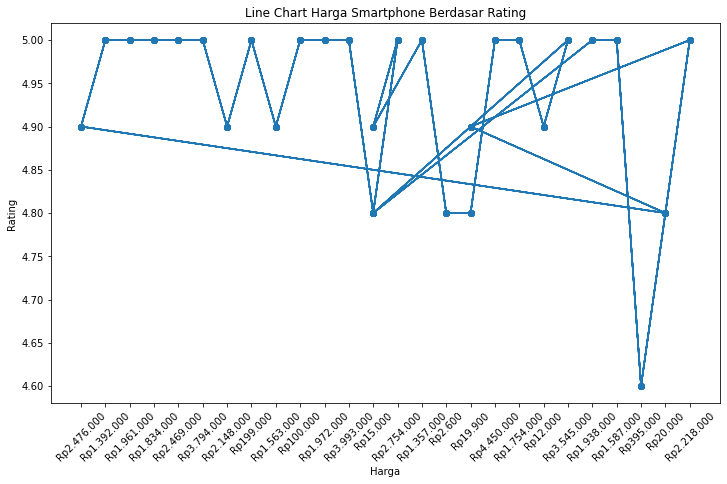

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_smartphone_uas.csv')

# Line Chart
plt.figure(figsize=(12, 7))
plt.plot(data['Price'], data['Rating'], marker='o')
plt.title('Line Chart Harga Smartphone Berdasar Rating')
plt.xlabel('Harga')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.savefig('LineChart_smartphone_uas.jpg', dpi=300, bbox_inches='tight')
plt.show()

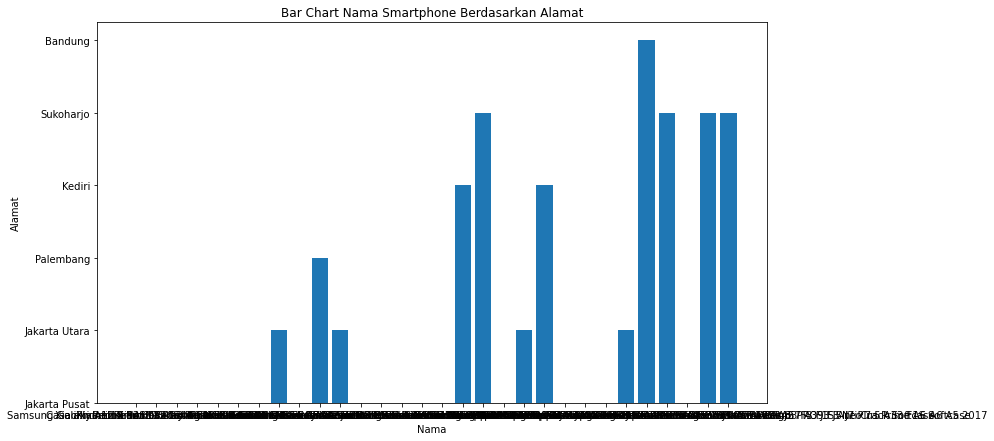

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_smartphone_uas.csv')

# Bar Chart
plt.figure(figsize=(12, 7))
plt.bar(data['Name'], data['Address'])
plt.title('Bar Chart Nama Smartphone Berdasarkan Alamat')
plt.xlabel('Nama')
plt.ylabel('Alamat')
plt.savefig('BarChart_smartphone_uas.jpg', dpi=300, bbox_inches='tight')
plt.show()

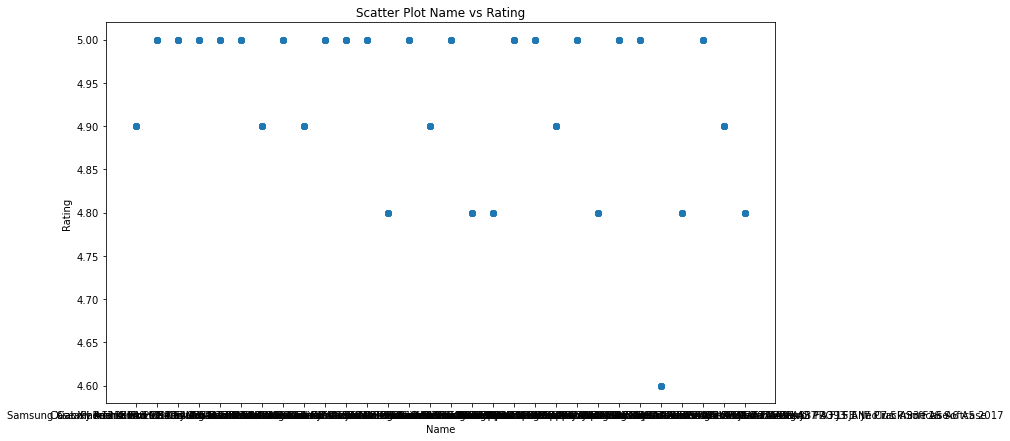

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_smartphone_uas.csv')

# Scatter Plot
plt.figure(figsize=(12, 7))
plt.scatter(data['Name'], data['Rating'])
plt.title('Scatter Plot Name vs Rating')
plt.xlabel('Name')
plt.ylabel('Rating')
plt.savefig('ScatterPlot_smartphone_uas.jpg', dpi=300, bbox_inches='tight')
plt.show()